In [29]:
!pip install mne
!pip install pandas
!pip install -U scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 2.8 MB/s eta 0:00:04
     -                                        0.3/9.2 MB 2.8 MB/s eta 0:00:04
     -                                        0.4/9.2 MB 3.0 MB/s eta 0:00:03
     --                                       0.6/9.2 MB 3.2 MB/s eta 0:00:03
     ---                                      0.8/9.2 MB 3.4 MB/s eta 0:00:03
     ----                                     1.1/9.2 MB 3.5 MB/s eta 0:00:03
     -----                                    1.2/9.2 MB 3.7 MB/s eta 0:00:03
     ------                                   1.5/9.2 MB 3.6 MB/s eta 0:00:03
     -------                                  1.7/9.2 MB 3.7 MB/s eta 0:00:03
     --------                                 1.9/9.2 MB 3.7 MB/s eta 0:00:02
     --------                                 2.0/9.2 MB 3.8 MB/s eta 0:00:02
     ---------                                2.2/9.2 MB 3.8 MB/s eta 0

In [5]:
import mne
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
plt.ion()

## Paths

In [6]:
data_path = '../data/'
patient_25_path = data_path + '25.csv'
column_labels_path = data_path + 'columnLabels.csv'
time_path = data_path + 'time.csv'
demographic_path = data_path + 'demographic.csv'
merged_trial_data_path = data_path + 'mergedTrialData.csv'
ERP_data_path = data_path + 'ERPdata.csv'


## Column labels

In [8]:
column_labels = pd.read_csv(column_labels_path)

In [9]:
column_labels

,subject,trial,condition,sample,Fp1,AF7,AF3,F1,F3,F5,...,P10,PO8,PO4,O2,VEOa,VEOb,HEOL,HEOR,Nose,TP10


## Patient 25 data

In [10]:
patient = pd.read_csv(patient_25_path, names=column_labels.columns)

In [11]:
patient

,subject,trial,condition,sample,Fp1,AF7,AF3,F1,F3,F5,...,P10,PO8,PO4,O2,VEOa,VEOb,HEOL,HEOR,Nose,TP10
0,25.0,100.0,1.0,1.0,163.6861,-59.5712,-97.4962,30.9987,109.9633,16.5351,...,-9.0616,9.2542,16.4438,30.9464,121.6653,2.2665,30.2345,99.7302,4.7559,-1.7048
1,25.0,100.0,1.0,2.0,159.1006,-60.2822,-94.5368,31.5271,109.1847,18.0282,...,-12.1559,8.4209,16.3126,30.3871,116.8195,6.0347,32.4924,97.4877,7.1555,-8.4503
2,25.0,100.0,1.0,3.0,155.9969,-56.8593,-90.7525,31.6880,107.4168,20.0397,...,-15.5110,5.6117,14.7600,27.4530,116.3488,7.0529,33.9064,85.6828,7.9614,-13.3521
3,25.0,100.0,1.0,4.0,152.8249,-58.5290,-95.3562,27.5709,102.5454,17.9719,...,-17.0882,3.2644,12.5305,25.4086,105.1124,1.3680,34.9299,59.0185,6.4391,-14.8008
4,25.0,100.0,1.0,5.0,153.2037,-59.6138,-96.9548,26.6000,101.4989,17.6523,...,-18.3553,3.4867,12.2156,25.7534,92.2354,-5.9263,34.4689,40.4010,2.3700,-15.3901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909307,25.0,9.0,3.0,3068.0,-5.6227,7.9115,-10.4431,-0.8315,-3.7385,-5.5174,...,-0.8136,2.7589,-0.7932,4.7628,-23.4615,-15.3474,-1.6754,-12.5715,-7.0948,-3.6879
909308,25.0,9.0,3.0,3069.0,-7.4910,5.7208,-10.7197,-0.9345,-4.7251,-4.1371,...,0.1677,3.7301,-0.2876,5.4159,-21.2648,-12.6352,-1.1693,-10.4355,-7.0735,-4.3845
909309,25.0,9.0,3.0,3070.0,-7.4572,8.0874,-10.1808,0.2171,-4.7527,-0.6597,...,2.1208,6.4215,2.0231,8.0073,-20.4274,-13.7825,-2.3663,-9.0963,-8.0366,-2.6904
909310,25.0,9.0,3.0,3071.0,-6.0163,13.0608,-9.0206,0.8927,-4.7028,0.8788,...,3.1019,6.7512,1.8637,8.4240,-21.0589,-15.0859,-2.8133,-8.6009,-8.7184,0.7536


## Time

In [12]:
time = pd.read_csv(time_path)

In [13]:
time

,sample,time_ms
0,1,-1500.0000
1,2,-1499.0234
2,3,-1498.0469
3,4,-1497.0703
4,5,-1496.0938
...,...,...
3067,3068,1495.1172
3068,3069,1496.0938
3069,3070,1497.0703
3070,3071,1498.0469


In [14]:
patient_bt = patient[patient['condition'] == 1].reset_index(drop=True)
patient_bt.head(7000)

,subject,trial,condition,sample,Fp1,AF7,AF3,F1,F3,F5,...,P10,PO8,PO4,O2,VEOa,VEOb,HEOL,HEOR,Nose,TP10
0,25.0,100.0,1.0,1.0,163.6861,-59.5712,-97.4962,30.9987,109.9633,16.5351,...,-9.0616,9.2542,16.4438,30.9464,121.6653,2.2665,30.2345,99.7302,4.7559,-1.7048
1,25.0,100.0,1.0,2.0,159.1006,-60.2822,-94.5368,31.5271,109.1847,18.0282,...,-12.1559,8.4209,16.3126,30.3871,116.8195,6.0347,32.4924,97.4877,7.1555,-8.4503
2,25.0,100.0,1.0,3.0,155.9969,-56.8593,-90.7525,31.6880,107.4168,20.0397,...,-15.5110,5.6117,14.7600,27.4530,116.3488,7.0529,33.9064,85.6828,7.9614,-13.3521
3,25.0,100.0,1.0,4.0,152.8249,-58.5290,-95.3562,27.5709,102.5454,17.9719,...,-17.0882,3.2644,12.5305,25.4086,105.1124,1.3680,34.9299,59.0185,6.4391,-14.8008
4,25.0,100.0,1.0,5.0,153.2037,-59.6138,-96.9548,26.6000,101.4989,17.6523,...,-18.3553,3.4867,12.2156,25.7534,92.2354,-5.9263,34.4689,40.4010,2.3700,-15.3901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,25.0,11.0,1.0,852.0,11.7908,14.5141,10.0106,11.1402,10.0819,5.6846,...,-3.4278,-7.0440,0.2626,-6.3450,40.6528,-21.8197,46.3282,-2.4249,-2.0833,7.1706
6996,25.0,11.0,1.0,853.0,6.0872,7.9777,2.9775,8.4237,7.6223,2.7180,...,-3.8840,-7.6698,0.3257,-5.7217,42.0950,-20.6065,43.2859,-0.7990,-3.7436,12.4864
6997,25.0,11.0,1.0,854.0,4.7336,5.9272,1.8753,8.6097,7.5141,3.1111,...,-3.1559,-6.8129,0.9555,-4.8509,41.5216,-22.0026,39.6968,-2.4700,-6.8882,12.3494
6998,25.0,11.0,1.0,855.0,5.5453,4.6846,5.7714,9.4123,7.1580,7.4367,...,-3.6595,-7.2828,1.2326,-4.7404,42.1044,-22.7112,40.2639,-2.0785,-7.1578,8.6185


In [15]:

npdata = np.array(patient)
# Sample 1537 is time 0, use that for the event
onsets = np.array(np.where(npdata[:,3]==1537))


# Conditions when sample is 1537
conditions = npdata[npdata[:,3]==1537,2]


#print(conditions)

#use these to make an events array for mne (middle column are zeros):
events = np.squeeze(np.dstack((onsets.flatten(), np.zeros(conditions.shape),conditions)))


#print(events)
n_channels = int(npdata.shape[0]/onsets.shape[1])

x = (len(conditions), int(npdata.shape[0]/onsets.shape[1]), npdata.shape[1])

print(x)


(296, 3072, 74)


## ERP dataset

In [16]:
erp = pd.read_csv(ERP_data_path)
erp[erp['subject']==25]

,subject,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms
221184,25,1,-0.850187,-1.306923,-0.375315,-1.425232,-0.979890,-1.442365,-1.416631,-1.275436,-1.907462,-1500.0000
221185,25,1,-0.705009,-1.365388,-0.288836,-1.411512,-0.938154,-1.545942,-1.277440,-1.461394,-1.697841,-1499.0234
221186,25,1,-0.763003,-1.437693,-0.316138,-1.358225,-0.869388,-1.570551,-1.215264,-1.638352,-1.595305,-1498.0469
221187,25,1,-0.968127,-1.573287,-0.448802,-1.452555,-1.057985,-1.610821,-1.311872,-1.646647,-1.606985,-1497.0703
221188,25,1,-1.170671,-1.748406,-0.392476,-1.541002,-1.157668,-1.649429,-1.335015,-1.569233,-1.493616,-1496.0938
...,...,...,...,...,...,...,...,...,...,...,...,...
230395,25,3,-0.319602,1.062137,0.741724,0.847265,0.244433,0.809760,0.329067,0.295573,0.441239,1495.1172
230396,25,3,-0.294669,1.132657,0.775776,0.942935,0.188131,0.922226,0.223960,0.393370,0.409479,1496.0938
230397,25,3,-0.193828,1.304207,0.835874,1.070639,0.327425,1.010255,0.285136,0.362179,0.470546,1497.0703
230398,25,3,-0.039877,1.481025,0.967239,1.078745,0.486591,1.093191,0.562799,0.445385,0.677753,1498.0469


## EpochsArray

In [17]:
# Electrode list
channels = list(patient.columns[4:])

# define the channel type, where the first 64 are EEG, next 4 are EOG, then Nose,
#and finally right mastoid (EEG)
ch_type = ['eeg']*64 + ['eog']*4 + ['misc'] + ['eeg']

# Sampling frequency in Hertz (samples per second)
sampling_freq = 1024

info = mne.create_info(ch_names=channels, sfreq=sampling_freq, ch_types=ch_type)
info.set_montage('standard_1005')


# Entries where time is 0
signals = patient[patient['sample'] == 1537]
n_epochs = len(signals.axes[0])
n_channels = len(time.index)
n_times = len(patient.axes[1])


events = np.squeeze(np.dstack((list(signals.index), [0 for i in range(len(signals.index))],list(signals['condition']))))

npdata = np.array(patient)
EEGdata = npdata.reshape(n_epochs, n_channels, n_times)
#remove the first 4 columns (non-eeg)
EEGdata = EEGdata[:,:,4:]
EEGdata = np.swapaxes(EEGdata,1,2)

event_id = dict(button_tone=1, playback_tone=2, button_alone=3)

print('\n\n')
"""
    data: shape - >(n_epochs, n_channels, n_times)
        n_epochs: is the number of events (where time is 0 (sample 1537))
        n_channels: for each event we have 3072 sample(from -1.5 to 1.5)
        n_times: number of the electrodes
"""
epochs = mne.EpochsArray(data=EEGdata, info=info, events = events.astype('int'), tmin=-1.5, event_id=event_id)


evoked = epochs["button_tone"].average()






Not setting metadata
296 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


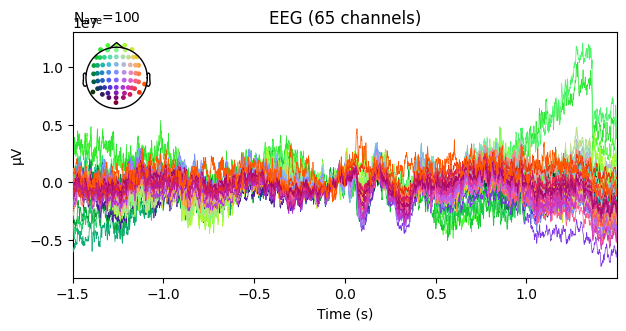

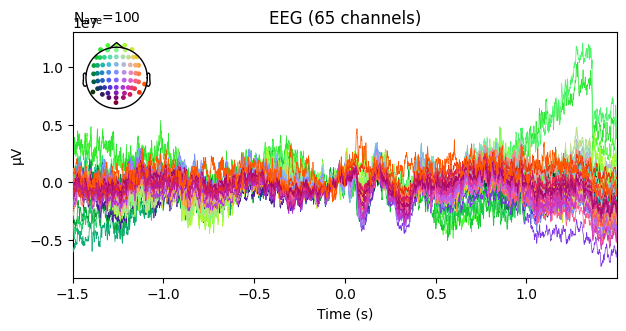

In [18]:
evoked.plot()

Using matplotlib as 2D backend.


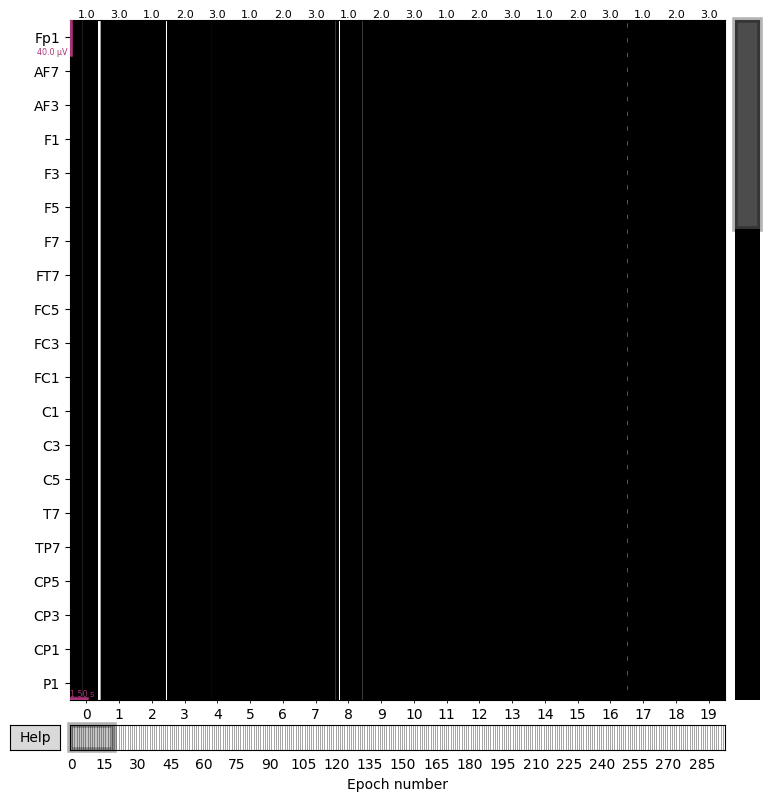

In [19]:
fig = epochs.plot(events=events)

In [20]:
# Pick EEG signal
picks=mne.pick_types(info=epochs.info, eeg=True)

# In the previous EEG experiment they bandpass filtered the EEG between 0.5 Hz and 15 Hz
epochs.filter(0.5, 15, picks=picks, method='fir')

Setting up band-pass filter from 0.5 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 6759 samples (6.601 s)



C:\Users\eleon\AppData\Local\Temp\ipykernel_23864\3648199104.py:5: RuntimeWarning: filter_length (6759) is longer than the signal (3072), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(0.5, 15, picks=picks, method='fir')


Number of events,296
Events,button_alone: 100button_tone: 100playback_tone: 96
Time range,-1.500 – 1.499 s
Baseline,off


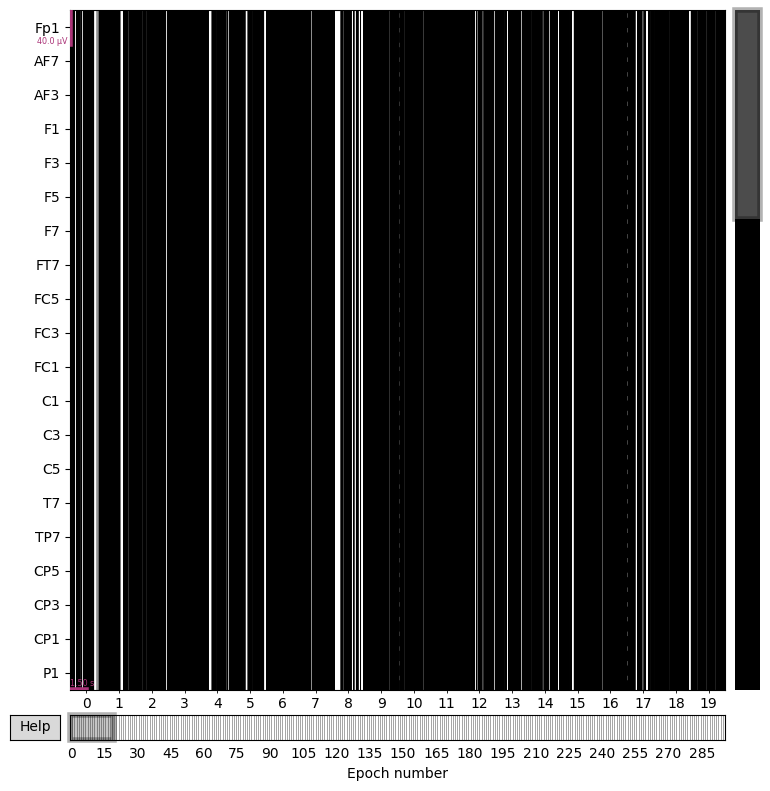

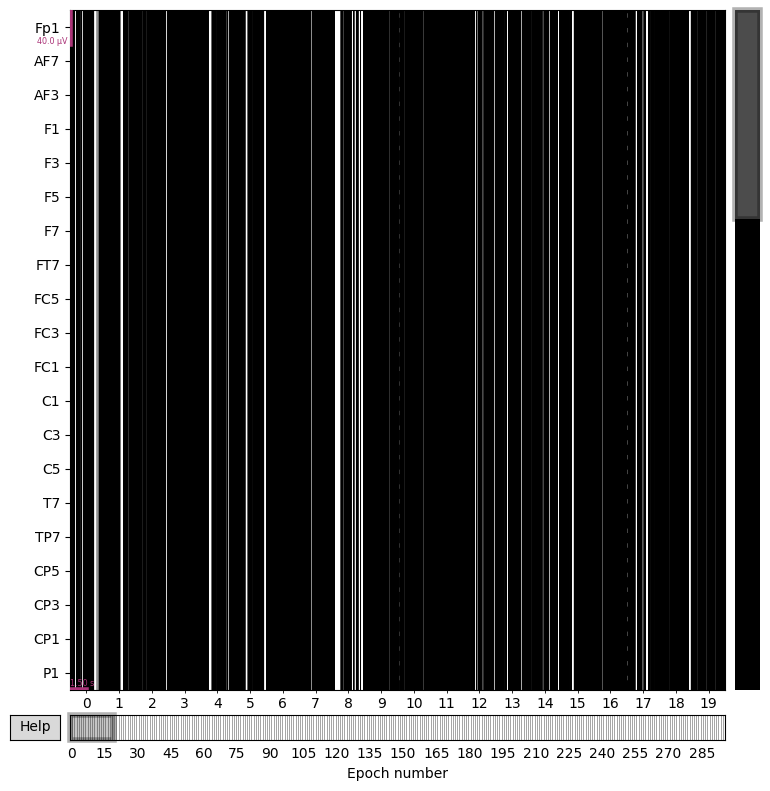

In [21]:
epochs.plot()

In [30]:
# Try out ICA
ica = mne.preprocessing.ICA(n_components=20, max_iter="auto", random_state=97)
ica.fit(epochs)

Fitting ICA to data using 65 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 66.5s.


Method,fastica
Fit,89 iterations on epochs (909312 samples)
ICA components,20
Available PCA components,65
Channel types,eeg
ICA components marked for exclusion,—


In [31]:
ica_epochs = ica.apply(epochs)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 65 PCA components


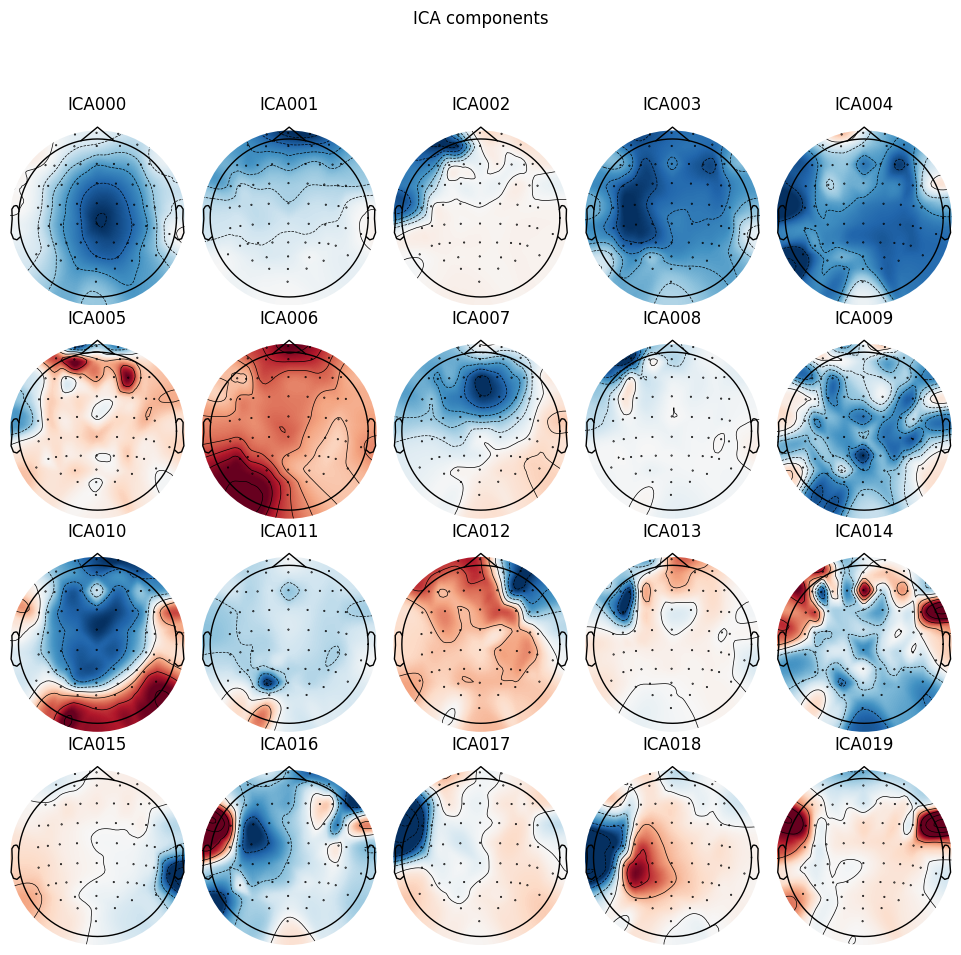

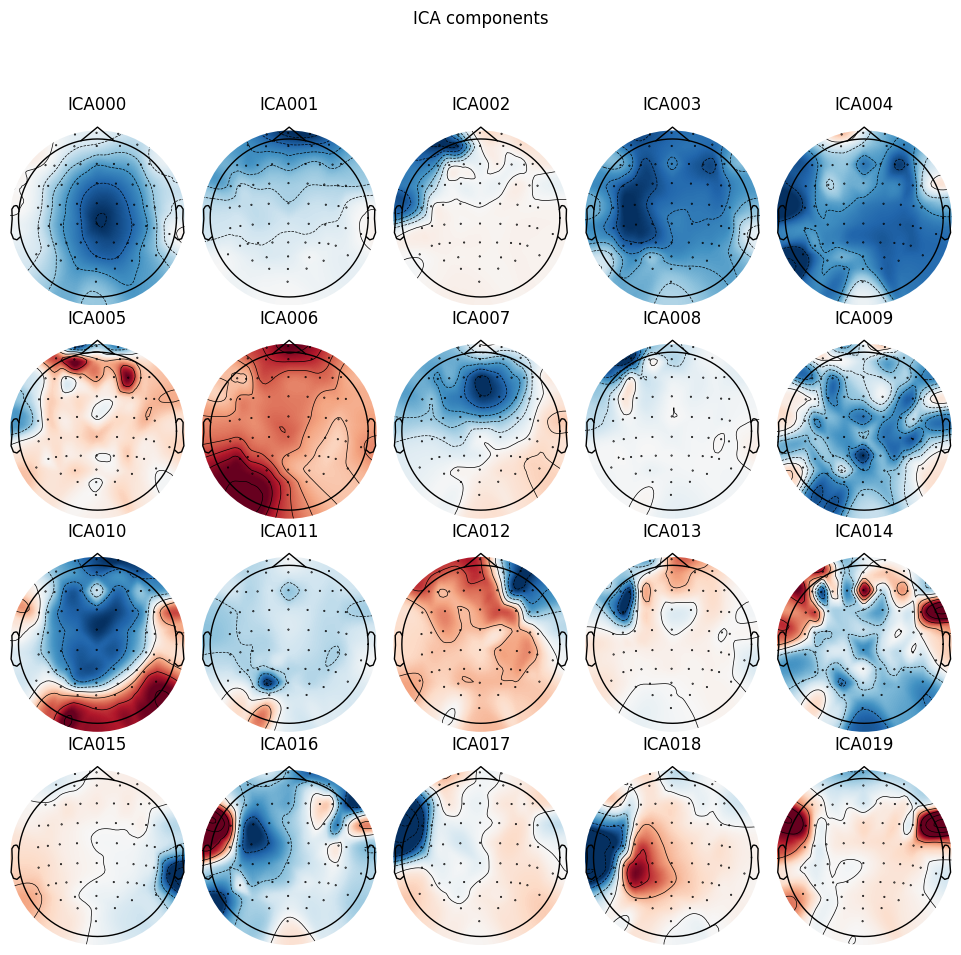

In [32]:
# Visualize components, look for components where the topography and time course resemble eye blink activity.
ica.plot_components()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


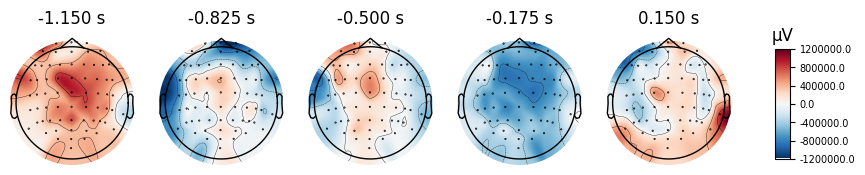

In [33]:
times = np.linspace(-1.15, 0.15, 5)
fig = epochs.average().plot_topomap(times, proj=False)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


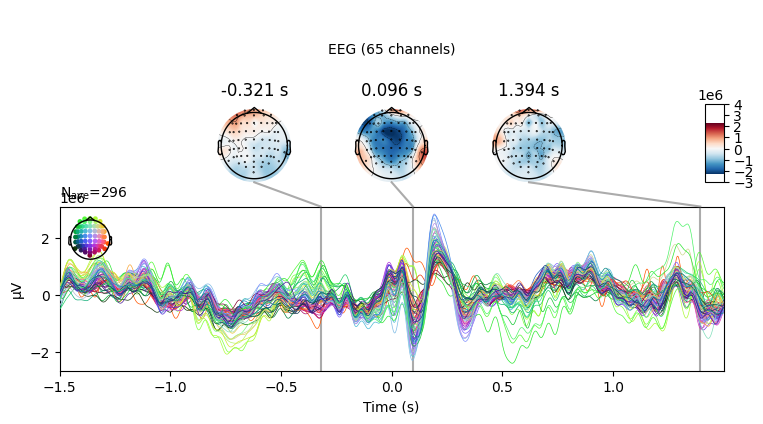

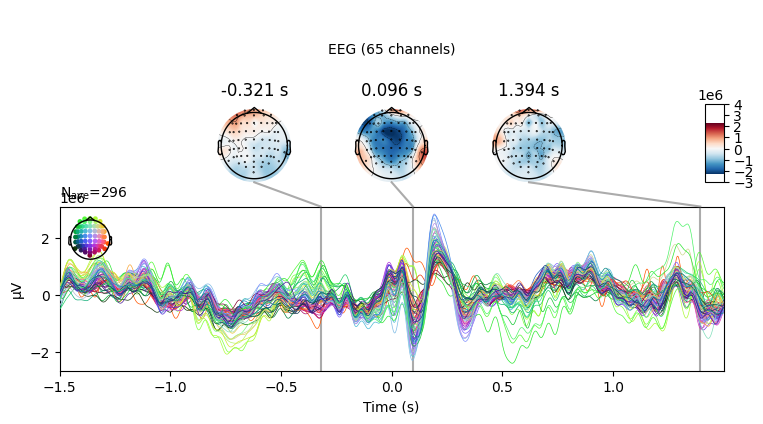

In [34]:
ecg_evoked = epochs.average()
ecg_evoked.plot_joint()

In [35]:
projs = mne.compute_proj_epochs(epochs)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


No gradiometers found. Forcing n_grad to 0
No magnetometers found. Forcing n_mag to 0
Adding projection: eeg-Multiple-events--1.500-1.499-PCA-01
Adding projection: eeg-Multiple-events--1.500-1.499-PCA-02


[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.2s


In [36]:
print(projs)

[<Projection | eeg-Multiple-events--1.500-1.499-PCA-01, active : False, n_channels : 65, exp. var : 58.12%>, <Projection | eeg-Multiple-events--1.500-1.499-PCA-02, active : False, n_channels : 65, exp. var : 17.13%>]


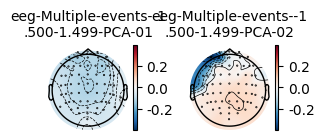

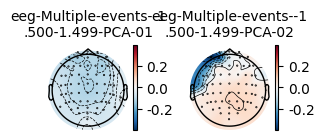

In [37]:
mne.viz.plot_projs_topomap(
    projs, colorbar=True, vlim="joint", info=epochs.info
)